<a href="https://colab.research.google.com/github/23151009-lab/Assignment-1/blob/main/Truong_Hien_Dat_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
uploaded = files.upload()

Saving Assignment1.png to Assignment1.png


**READ IMAGE (img)**

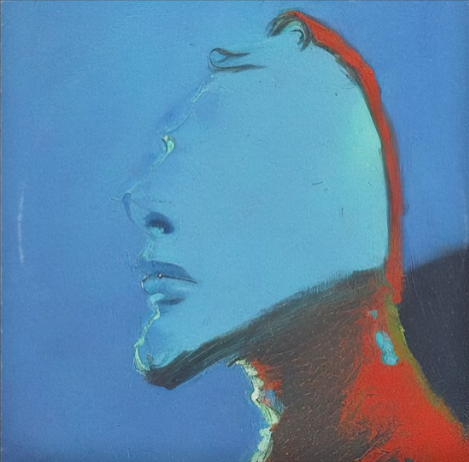

In [3]:
#Read image
img = cv.imread('Assignment1.png') #BGR

#Show image
cv2_imshow(img)

**EXTRACT IMAGE AND SHOW RGB IN THE SAME FIGURE**

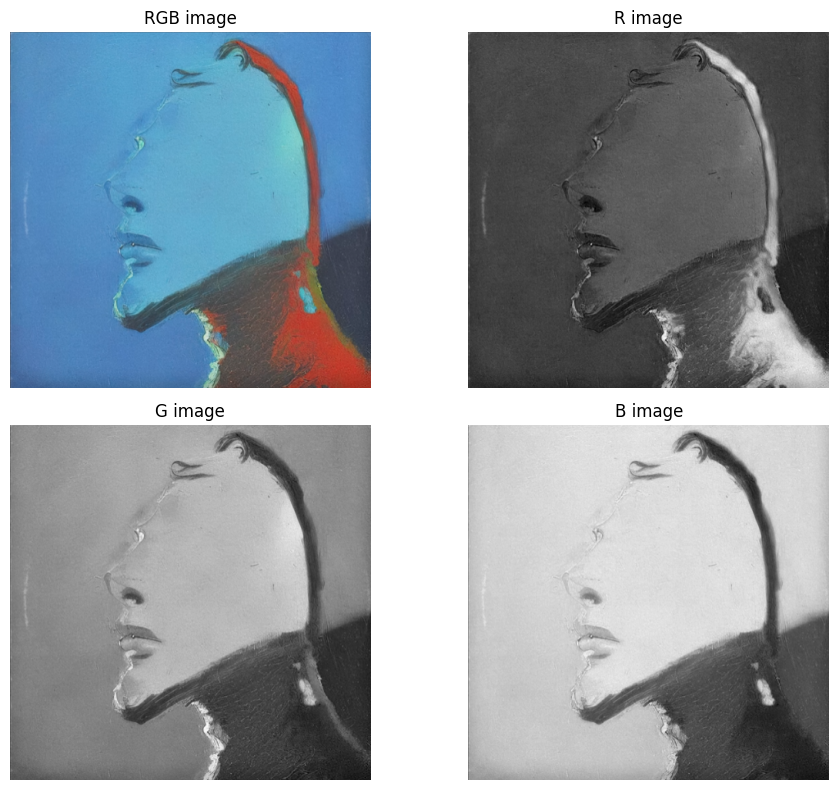

In [4]:
# Extract BGR channels
b = img[:, :, 0]
g = img[:, :, 1]
r = img[:, :, 2]

# Create a figure
plt.figure(figsize=(10, 8))

# Add origin
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)) # Convert from BGR (opencv) to RGB (matplot)
plt.title('RGB image')
plt.axis('off')

# Red channel
plt.subplot(2, 2, 2)
plt.imshow(r, cmap='gray')
plt.title('R image')
plt.axis('off')

# Green channel
plt.subplot(2, 2, 3)
plt.imshow(g, cmap='gray')
plt.title('G image')
plt.axis('off')

# Blue channel
plt.subplot(2, 2, 4)
plt.imshow(b, cmap='gray')
plt.title('B image')
plt.axis('off')

plt.tight_layout()
plt.show()


**CROP IMAGE**

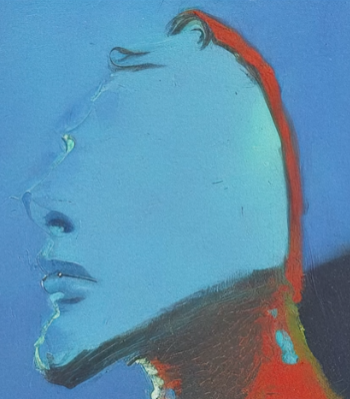

In [5]:
img=cv.imread('Assignment1.png')

cropped = img[1:400, 100:450]

cv2_imshow(cropped)

**FIND THE MAXIMUM VALUE AND INDEX OF MAX VALUE OF PIXEL**

In [6]:
img = cv.imread('Assignment1.png')

# Split into channels
b, g, r = cv.split(img)

# Find maximum values
max_b = np.max(b)
max_g = np.max(g)
max_r = np.max(r)

# Find indexes (y, x) of those max values
y_b, x_b = np.unravel_index(np.argmax(b), b.shape)
y_g, x_g = np.unravel_index(np.argmax(g), g.shape)
y_r, x_r = np.unravel_index(np.argmax(r), r.shape)

print(f"Blue channel:  max={max_b} at (x={x_b}, y={y_b})")
print(f"Green channel: max={max_g} at (x={x_g}, y={y_g})")
print(f"Red channel:   max={max_r} at (x={x_r}, y={y_r})")


Blue channel:  max=234 at (x=142, y=285)
Green channel: max=229 at (x=253, y=394)
Red channel:   max=215 at (x=256, y=397)


**FIND THE MINIMUM VALUE AND INDEX OF MIN VALUE OF PIXEL**

In [7]:
img = cv.imread('Assignment1.png')

# Split into channels
b, g, r = cv.split(img)

# Find maximum values
min_b = np.min(b)
min_g = np.min(g)
min_r = np.min(r)

# Find indexes (y, x) of max values
y_b, x_b = np.unravel_index(np.argmin(b), b.shape)
y_g, x_g = np.unravel_index(np.argmin(g), g.shape)
y_r, x_r = np.unravel_index(np.argmin(r), r.shape)

print(f"Blue channel:  min={max_b} at (x={x_b}, y={y_b})")
print(f"Green channel: min={max_g} at (x={x_g}, y={y_g})")
print(f"Red channel:   min={max_r} at (x={x_r}, y={y_r})")


Blue channel:  min=234 at (x=461, y=458)
Green channel: min=229 at (x=461, y=458)
Red channel:   min=215 at (x=165, y=229)


**INCREASE THE INTENSITY LINEAR OF THE IMAGE**

How much do you want to change the image intensity (0-255): 0.5


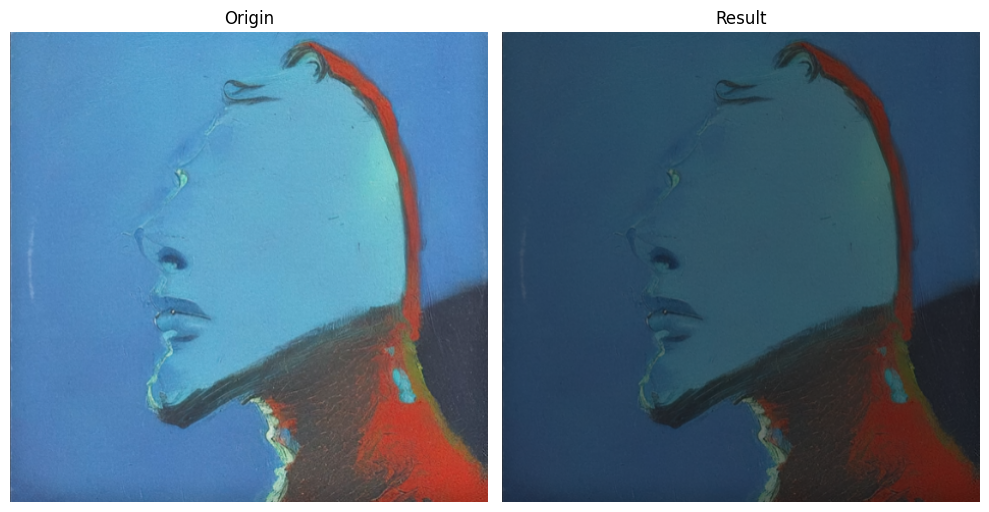

In [8]:
img = cv.imread('Assignment1.png')

# Input alpha
alpha = float(input("How much do you want to change the image intensity (0-255): "))

# Apply linear scaling
output = np.clip(img * alpha, 0, 255).astype(np.uint8)

# Result
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)) # Convert from BGR (opencv) to RGB (matplot)
plt.title('Origin')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
plt.title('Result')
plt.axis('off')

plt.tight_layout()
plt.show()


**Subtract two images/find the difference of two images (without alignment)**

In [9]:
uploaded = files.upload()

In [2]:
img1 = cv.imread('image1.png')
img2 = cv.imread('image2.png')

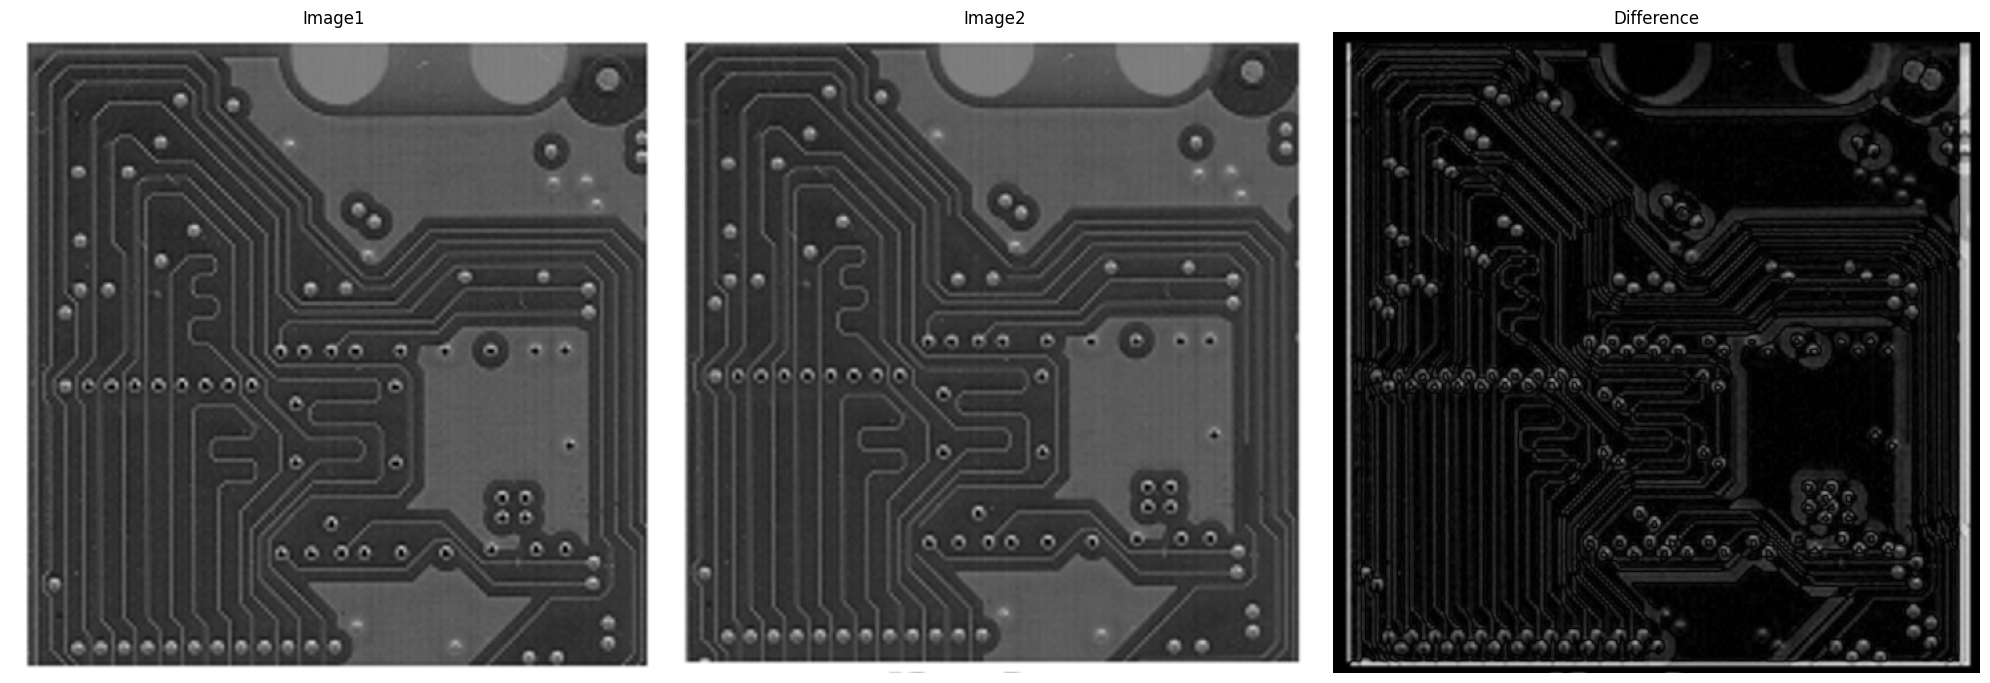

In [25]:
# Resize img2 to match img1
img2 = cv.resize(img2, (img1.shape[1], img1.shape[0]))

# Compute absolute difference
diff = cv.absdiff(img1, img2)

plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.title('Image1')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.title('Image2')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(diff)
plt.title('Difference')
plt.axis('off')

plt.tight_layout()
plt.show()

**Subtract two images/find the difference of two images (**with** alignment)**

In [12]:
uploaded = files.upload()


In [5]:
img1 = cv.imread('image1.png')
img2 = cv.imread('image2.png')

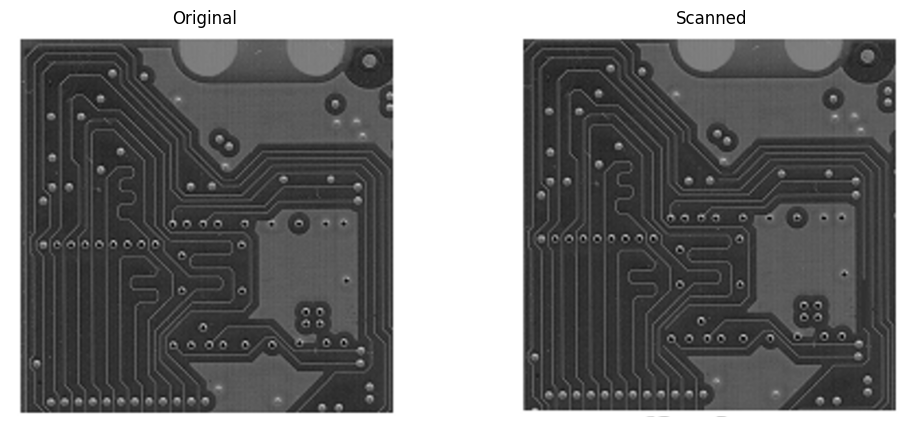

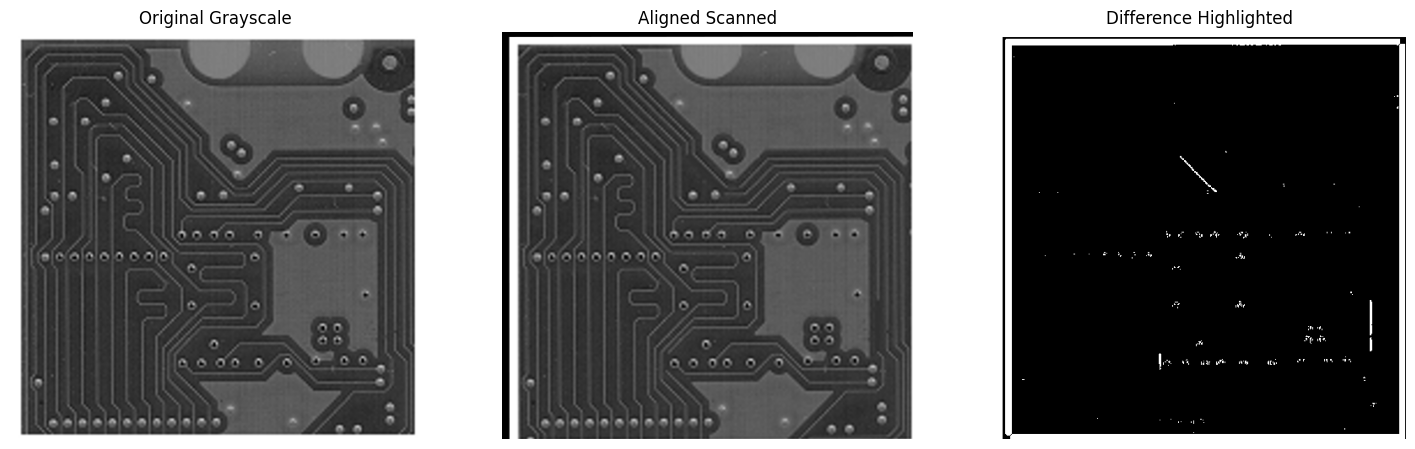

In [6]:
# Original images
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title('Scanned')
plt.axis('off')
plt.show()

# Convert to grayscale
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# Create ORB detector
MAX_NUM_FEATURES = 5000
orb = cv.ORB_create(MAX_NUM_FEATURES)

# Find keypoints and descriptors
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

# Feature matching
matcher = cv.DescriptorMatcher_create(cv.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(des1, des2)
matches = list(matches)  # ensure list

# Sort matches
matches.sort(key=lambda x: x.distance)
numGoodMatches = max(1, int(len(matches)*0.1))
good_matches = matches[:numGoodMatches]

# Extract matched points
points1 = np.zeros((len(good_matches),2), dtype=np.float32)
points2 = np.zeros((len(good_matches),2), dtype=np.float32)

for i, match in enumerate(good_matches):
    points1[i,:] = kp1[match.queryIdx].pt
    points2[i,:] = kp2[match.trainIdx].pt

# Find homography
h, mask = cv.findHomography(points2, points1, cv.RANSAC)

# Warp scanned image to align with original
height, width, channels = img1.shape
aligned_img2 = cv.warpPerspective(img2, h, (width, height))

# Compute absolute difference
diff_gray = cv.absdiff(img1, aligned_img2)
_, diff_thresh = cv.threshold(diff_gray, 25, 255, cv.THRESH_BINARY) #increase the intensity of the difference

# Display results
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(img1, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(aligned_img2, cmap='gray')
plt.title('Aligned Scanned')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(diff_thresh, cmap='gray')
plt.title('Difference Highlighted')
plt.axis('off')
plt.show()
